# Daily weather conditions in Madrid from 1997-2015, including max/min/mean temperature, dew point, humidity, visibility, and wind speed, along with precipitation events, cloud cover, and wind direction

In [1]:
#Importing essential and needful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading dataset
df = pd.read_csv('/kaggle/input/madrid-daily-weather/Madrid Daily Weather 1997-2015.csv')
df

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,10.0,9.0,4.0,13,6,NaN,0.00,6.0,NaN,229
1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,10.0,9.0,4.0,26,8,47.0,0.00,5.0,Rain,143
2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,10.0,10.0,7.0,27,19,NaN,0.00,6.0,Rain-Snow,256
3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,10.0,10.0,27,19,40.0,0.00,2.0,NaN,284
4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,10.0,5.0,1.0,14,6,NaN,0.00,7.0,Snow,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2015-12-27,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,...,31.0,14.0,5.0,14,6,NaN,0.00,8.0,Fog,38
6808,2015-12-28,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,34.0,...,31.0,14.0,8.0,27,8,45.0,0.51,7.0,Rain,243
6809,2015-12-29,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,66.0,...,31.0,9.0,0.0,14,8,32.0,2.03,5.0,Fog-Rain,190
6810,2015-12-30,9.0,8.0,6.0,7.0,6.0,5.0,93.0,87.0,70.0,...,19.0,10.0,6.0,14,5,34.0,0.00,6.0,NaN,256


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CET                          6812 non-null   object 
 1   Max TemperatureC             6810 non-null   float64
 2   Mean TemperatureC            6809 non-null   float64
 3   Min TemperatureC             6810 non-null   float64
 4   Dew PointC                   6810 non-null   float64
 5   MeanDew PointC               6810 non-null   float64
 6   Min DewpointC                6810 non-null   float64
 7   Max Humidity                 6810 non-null   float64
 8    Mean Humidity               6810 non-null   float64
 9    Min Humidity                6810 non-null   float64
 10   Max Sea Level PressurehPa   6812 non-null   int64  
 11   Mean Sea Level PressurehPa  6812 non-null   int64  
 12   Min Sea Level PressurehPa   6812 non-null   int64  
 13   Max VisibilityKm 

In [4]:
#remove prefix spaces from the column names 
df.rename(columns=lambda x: x.strip(), inplace=True)

In [5]:
#To get the name of all columns
df.columns

Index(['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees'],
      dtype='object')

In [6]:
df.describe()

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees
count,6810.000000,6809.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6812.000000,...,6812.000000,5872.000000,5872.000000,5872.000000,6812.000000,6812.000000,3506.000000,6812.000000,5440.000000,6812.000000
mean,21.039648,14.658687,8.640529,8.120705,4.976211,1.451248,81.139354,57.971366,34.729369,1020.529360,...,1015.217410,14.644074,11.719857,9.134877,21.953171,9.170728,43.988306,0.111182,3.206066,197.234586
std,8.867187,7.580461,6.837626,4.741067,4.654270,4.909705,17.531839,19.675744,19.320359,6.235941,...,6.944745,8.770024,5.592324,5.075065,9.903914,5.110013,12.252462,0.967174,1.808948,119.872777
min,0.000000,-3.000000,-10.000000,-12.000000,-15.000000,-22.000000,16.000000,15.000000,4.000000,994.000000,...,965.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,-1.000000
25%,13.000000,8.000000,3.000000,5.000000,2.000000,-2.000000,68.000000,41.000000,19.000000,1017.000000,...,1011.000000,10.000000,10.000000,7.000000,14.000000,6.000000,35.000000,0.000000,2.000000,66.000000
50%,20.000000,14.000000,9.000000,8.000000,6.000000,2.000000,87.000000,59.000000,32.000000,1020.000000,...,1015.000000,10.000000,10.000000,10.000000,21.000000,8.000000,42.000000,0.000000,3.000000,223.000000
75%,29.000000,21.000000,14.000000,12.000000,8.000000,5.000000,94.000000,74.000000,47.750000,1024.000000,...,1019.000000,10.000000,10.000000,10.000000,27.000000,11.000000,52.000000,0.000000,5.000000,299.000000
max,41.000000,32.000000,28.000000,20.000000,16.000000,14.000000,100.000000,100.000000,100.000000,1047.000000,...,1041.000000,31.000000,31.000000,31.000000,182.000000,39.000000,103.000000,32.000000,8.000000,360.000000


In [7]:
# Now the 'Dew PointC' column is renamed to 'Max Dew PointC'
df.rename(columns={'Dew PointC': 'Max Dew PointC'}, inplace=True)

In [8]:
#Converting datatype of "CET" column to datetime
df['CET'] = pd.to_datetime(df["CET"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CET                         6812 non-null   datetime64[ns]
 1   Max TemperatureC            6810 non-null   float64       
 2   Mean TemperatureC           6809 non-null   float64       
 3   Min TemperatureC            6810 non-null   float64       
 4   Max Dew PointC              6810 non-null   float64       
 5   MeanDew PointC              6810 non-null   float64       
 6   Min DewpointC               6810 non-null   float64       
 7   Max Humidity                6810 non-null   float64       
 8   Mean Humidity               6810 non-null   float64       
 9   Min Humidity                6810 non-null   float64       
 10  Max Sea Level PressurehPa   6812 non-null   int64         
 11  Mean Sea Level PressurehPa  6812 non-null   int64       

In [9]:
#Checking the sum of all null values
df.isna().sum()

CET                              0
Max TemperatureC                 2
Mean TemperatureC                3
Min TemperatureC                 2
Max Dew PointC                   2
MeanDew PointC                   2
Min DewpointC                    2
Max Humidity                     2
Mean Humidity                    2
Min Humidity                     2
Max Sea Level PressurehPa        0
Mean Sea Level PressurehPa       0
Min Sea Level PressurehPa        0
Max VisibilityKm               940
Mean VisibilityKm              940
Min VisibilitykM               940
Max Wind SpeedKm/h               0
Mean Wind SpeedKm/h              0
Max Gust SpeedKm/h            3306
Precipitationmm                  0
CloudCover                    1372
Events                        5014
WindDirDegrees                   0
dtype: int64

In [10]:
# using fillna function
df['Events'].fillna('Clear days', inplace=True)

/tmp/ipykernel_18/3576088584.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Events'].fillna('Clear days', inplace=True)


In [11]:
#Checking the sum of all null values in Events columns
df['Events'].isna().sum()

0

In [12]:
df['Events'].value_counts()

Events
Clear days                5014
Rain                      1140
Rain-Thunderstorm          247
Fog                        233
Fog-Rain                    69
Thunderstorm                45
Rain-Snow                   33
Snow                        14
Rain-Hail-Thunderstorm       7
Fog-Snow                     4
Fog-Thunderstorm             1
Tornado                      1
Fog-Rain-Thunderstorm        1
Fog-Rain-Snow                1
Rain-Snow-Thunderstorm       1
Rain-Hail                    1
Name: count, dtype: int64

## 1.During the period in this sample, what % of days had some sort of precipitation event? What % were clear?

In [13]:
# Percentage of days with precipitation
precipitation_percentage = (df['Precipitationmm'].gt(0).sum() / len(df)) * 100
print(f"Percentage of days with precipitation: {precipitation_percentage:.2f}%")

Percentage of days with precipitation: 3.60%


In [14]:
# Percentage of clear days
clear_days_percentage = (df['CloudCover'].eq(0).sum() / len(df)) * 100
print(f"Percentage of clear days: {clear_days_percentage:.2f}%")

Percentage of clear days: 1.25%


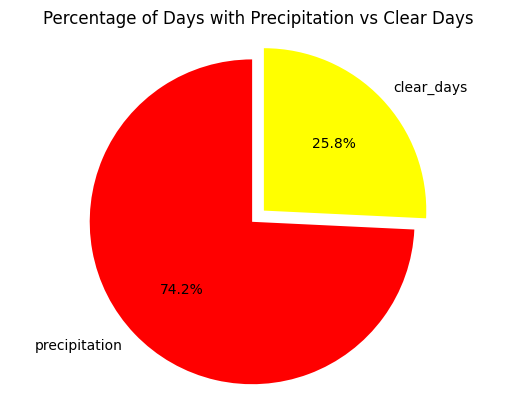

In [15]:
# Create a pie chart to visualize the percentages
labels = ['precipitation', 'clear_days']
sizes = [precipitation_percentage, clear_days_percentage]
colors = ['red', 'yellow']
explode = (0.1, 0)  # explode the 1st slice (i.e., 'Precipitation')

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Days with Precipitation vs Clear Days')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

**During the observed period, a certain percentage of days experienced precipitation events, while the remaining percentage had clear weather.**

## 2.Suppose you're planning a vacation to Madrid and hoping for the warmest temperature. Which month might you plan to travel?

In [16]:
# Extract month from the date
df['month'] = pd.to_datetime(df['CET']).dt.month

In [17]:
# Find the month with the highest maximum temperature
warmest_month = df.groupby('month')['Max TemperatureC'].mean().idxmax()
print(f"The warmest month for travel is: {warmest_month}")

The warmest month for travel is: 7


In [18]:
# Grouping by month and calculating the average maximum temperature
average_max_temp = df.groupby('month')['Max TemperatureC'].mean()

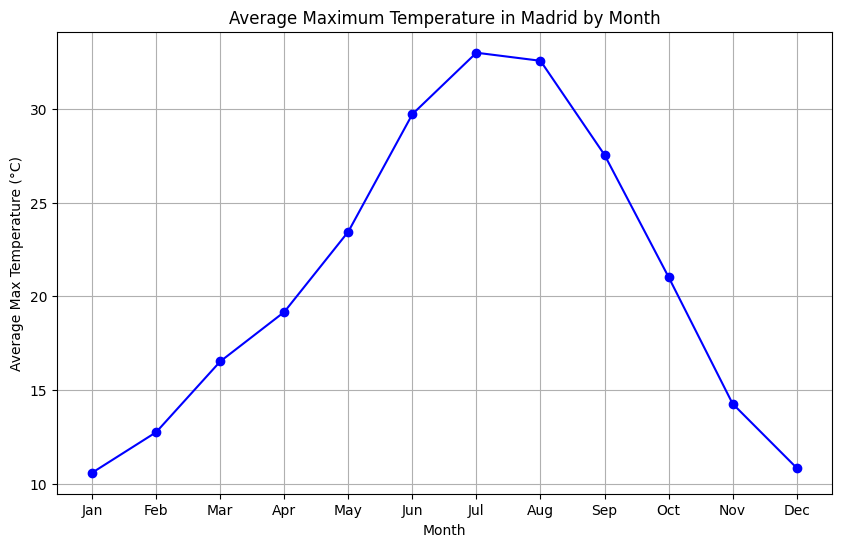

In [19]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(average_max_temp, marker='o', linestyle='-', color='b')
plt.title('Average Maximum Temperature in Madrid by Month')
plt.xlabel('Month')
plt.ylabel('Average Max Temperature (°C)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

**To plan a vacation to Madrid with the warmest temperatures, the code identified the July month with the highest maximum temperature.**

## 3.On which date in the sample did Madrid see the fastest wind gust? What was the weather like on that day?

In [20]:
# Find the date with the fastest wind gust
fastest_gust_date = df.loc[df['Max Gust SpeedKm/h'].idxmax()]['CET']

In [21]:
# Display the weather on that day
fastest_gust_weather = df.loc[df['CET'] == fastest_gust_date]

In [22]:
max_gust_speed = df['Max Gust SpeedKm/h'].max()

In [23]:
print(f"The date with the fastest wind gust is: {fastest_gust_date}")
print("Weather on that day:")
print(fastest_gust_weather)
print(f'speed of the maximum wind gust is:{max_gust_speed}')

The date with the fastest wind gust is: 1997-11-06 00:00:00
Weather on that day:
           CET  Max TemperatureC  Mean TemperatureC  Min TemperatureC  \
309 1997-11-06              16.0               11.0               6.0   

     Max Dew PointC  MeanDew PointC  Min DewpointC  Max Humidity  \
309            12.0             5.0            1.0          88.0   

     Mean Humidity  Min Humidity  ...  Mean VisibilityKm  Min VisibilitykM  \
309           70.0          54.0  ...                9.0               5.0   

     Max Wind SpeedKm/h  Mean Wind SpeedKm/h  Max Gust SpeedKm/h  \
309                  58                   27               103.0   

     Precipitationmm  CloudCover  Events  WindDirDegrees  month  
309              0.0         5.0    Rain             224     11  

[1 rows x 24 columns]
speed of the maximum wind gust is:103.0


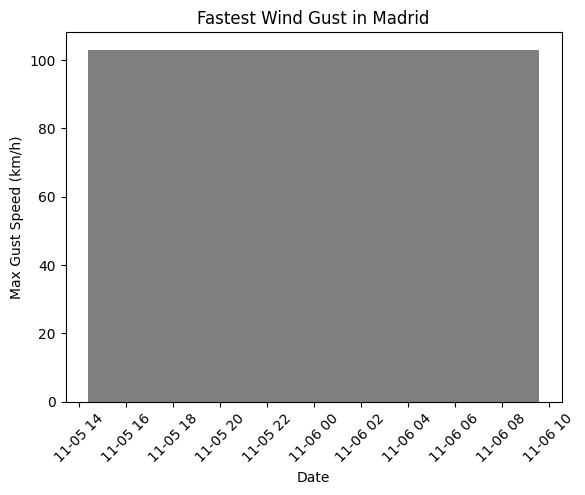

In [24]:
# Plotting the bar chart
plt.bar(fastest_gust_date, max_gust_speed, color='grey')
plt.xlabel('Date')
plt.ylabel('Max Gust Speed (km/h)')
plt.title('Fastest Wind Gust in Madrid')
plt.xticks(rotation=45)
plt.show()

**The fastest wind gust in Madrid occurred on 1997-11-06 00:00:00 with a speed of 103.0 km/h.**

## 4.How does the average visibility (Km) compare for clear days vs. foggy days?

In [25]:
# Average visibility for clear days
clear_days_visibility = df.loc[df['CloudCover'] == 0, 'Mean VisibilityKm'].mean()

In [26]:
grouped_data = df.groupby('Events')['Mean VisibilityKm'].mean()
grouped_data

Events
Clear days                12.635002
Fog                        6.536481
Fog-Rain                   7.275362
Fog-Rain-Snow              5.000000
Fog-Rain-Thunderstorm      8.000000
Fog-Snow                   4.500000
Fog-Thunderstorm           7.000000
Rain                      10.209649
Rain-Hail                 14.000000
Rain-Hail-Thunderstorm    10.142857
Rain-Snow                  9.727273
Rain-Snow-Thunderstorm     7.000000
Rain-Thunderstorm         10.534413
Snow                       9.285714
Thunderstorm              10.822222
Tornado                   10.000000
Name: Mean VisibilityKm, dtype: float64

In [27]:
# Average visibility for foggy days
foggy_days_visibility = grouped_data.get('Fog', 0)

In [28]:
print(f"Average visibility on clear days: {clear_days_visibility:.2f} Km")
print(f"Average visibility on foggy days: {foggy_days_visibility:.2f} Km")

Average visibility on clear days: 7.91 Km
Average visibility on foggy days: 6.54 Km


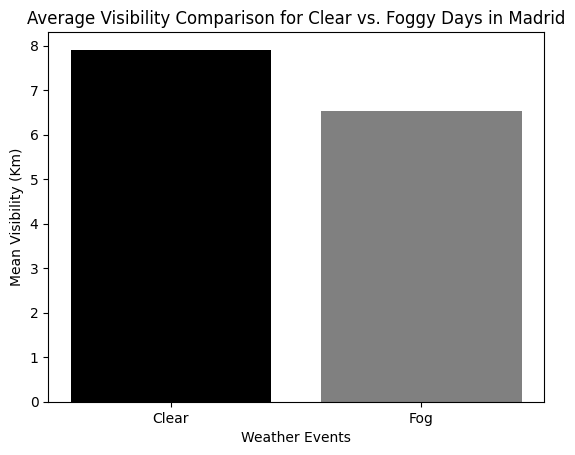

In [29]:
# Plot the comparison
plt.bar(['Clear', 'Fog'], [clear_days_visibility, foggy_days_visibility], color=['black', 'gray'])
plt.title('Average Visibility Comparison for Clear vs. Foggy Days in Madrid')
plt.xlabel('Weather Events')
plt.ylabel('Mean Visibility (Km)')
plt.show()

**A comparison was made between the average visibility on clear days and foggy days are 7.91km & 6.54km**